In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from glmnet import GLMNet, GLM
from sklearn.base import clone
import statsmodels.api as sm
from ISLP.models import summarize
import logging
logging.basicConfig(filename='log.txt', level=logging.INFO)
import rpy2
%load_ext rpy2.ipython

In [3]:
%%R -o X,Y,N
#install.packages('lars', repo='http://cloud.r-project.org')
library(lars)
library(glmnet)
data(diabetes)
X = model.matrix(lm(y ~ x, data=diabetes))[,-1]
N = colnames(diabetes$x)
Y = diabetes$y
system.time(glmnet:::glmnet.path(X, Y>140, family=binomial,alpha=0.4))


   user  system elapsed 
  0.089   0.004   0.093 


In [4]:
X = pd.DataFrame(X, columns=N)

In [5]:
yb = Y > 140


In [6]:
%%timeit 
G4 = GLMNet(family=sm.families.Binomial(), alpha=0.4 )
G4.fit(X, yb)

38.1 ms ± 281 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


(91, 10)

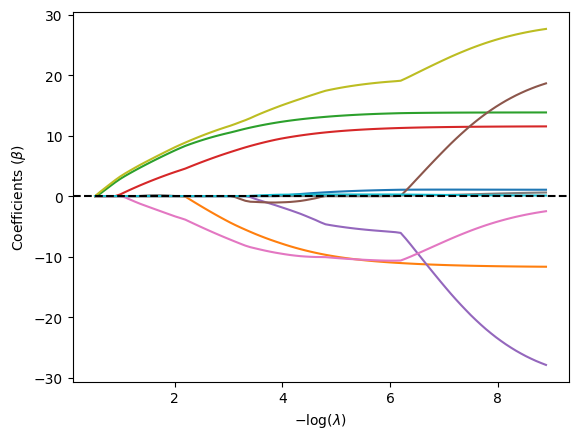

In [8]:
G4 = GLMNet(family=sm.families.Binomial(), alpha=0.4 )
G4.fit(X, yb)
G4.plot_coefficients()
G4.coefs_.shape

In [9]:
G = GLM(family=sm.families.Binomial(), summarize=True)
G.fit(X, yb)
G.summary_

,coef,std err,t,P>|t|
intercept,0.004324,0.126116,0.034283,0.972651
age,1.036363,2.792456,0.371130,0.710541
sex,-11.747698,3.078307,-3.816285,0.000135
bmi,13.825778,3.323134,4.160464,0.000032
map,11.543055,3.119553,3.700227,0.000215
tc,-32.906817,23.366760,-1.408275,0.159050
ldl,22.821665,19.819940,1.151450,0.249547
hdl,-0.477463,11.311322,-0.042211,0.966330
tch,0.847433,8.078814,0.104896,0.916459
ltg,29.575377,9.738541,3.036941,0.002390


In [10]:
X_ = G.design_ @ np.identity(G.design_.shape[1])
X_ = pd.DataFrame(X_, columns=G.summary_.index)
from ISLP.models import summarize
summarize(sm.GLM(yb, X_, 
                 family=sm.families.Binomial()).fit())

,coef,std err,z,P>|z|
intercept,0.0043,0.126,0.034,0.973
age,1.0364,2.792,0.371,0.711
sex,-11.7477,3.078,-3.816,0.000
bmi,13.8258,3.323,4.160,0.000
map,11.5431,3.120,3.700,0.000
tc,-32.9068,23.367,-1.408,0.159
ldl,22.8217,19.820,1.151,0.250
hdl,-0.4775,11.311,-0.042,0.966
tch,0.8474,8.079,0.105,0.916
ltg,29.5754,9.739,3.037,0.002


In [11]:
X_.shape, len(G.summary_.index)

((442, 11), 11)